In [12]:

import sys
### general purpose
import os
import numpy as np
import xarray as xr
import pandas as pd
### palette
import matplotlib.cm as mplcm
import matplotlib.ticker as mticker
#import matplotlib.cm as cm
#div_cmap = mplcm.seismic
import cmocean
from cmocean import cm
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import scipy.io as sio

%matplotlib inline



/home/barboty/anaconda2/lib/python2.7/site-packages/cmocean/tools.py:76: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not mpl.cbook.is_string_like(rgbin[0]):


In [26]:
# Recherche de la position - Pour un tourbillon cyclonique


def position(box,Dim):
    
    ### Recherche la position du centre par le maximum de SSH ###
    
    max = -100
    a = 0
    b = 0

    for i in range(Dim[0], Dim[1]+1):                            #Horizontale
        for j in range(Dim[2], Dim[3]+1):                        #Verticale
            if box[j][i] > max:
                max = box[j][i]
                a = i
                b = j
            
    return (a,b)  # (H,V)

In [27]:
def Tracking(m, box, path, PosIni):
    
    ### Suivi du tourbillon sur le mois m (string),
    ### pour une boite de 'box' pixels qui recherche le nouveau centre (i+1) 
    ### dans la boite centrée sur le centre à l'étape "i"
    ### Path : chemin incomplet vers le fichier à analyser
    ### PosIni : position initiale du tourbillon que l'on veut suivre
    
    DimBoite = [0,0,0,0]
    ListePosition = []
    nbjours = 0

    if (m == '01' or m == '03' or m == '05' or m == '07' or m == '08' or m == '10' or m == '12'):
        nbjours = 31
    elif (m == '02'):
        nbjours = 28
    else:
        nbjours = 30
        
    for i in range(1, nbjours+1):
        day = i
        if i<10:
            d = '0' + str(day)
        else:
            d = str(day)
        SSHfile = path + m + 'd' + d + '.1d_SSHMXL.nc'
        from netCDF4 import Dataset
        f = Dataset(SSHfile, "r", format="NETCDF4")
        SSH = f.variables['sossheig'][0]
        if i == 1:
            DimBoite = PosIni
            (hor, ver) = position(SSH, DimBoite)
        else:
            (hor, ver) = position(SSH, DimBoite)
        ListePosition.append([hor,ver])
        DimBoite = [hor-box,hor+box,ver-box,ver+box]
        
        return ListePosition

(54, 64)

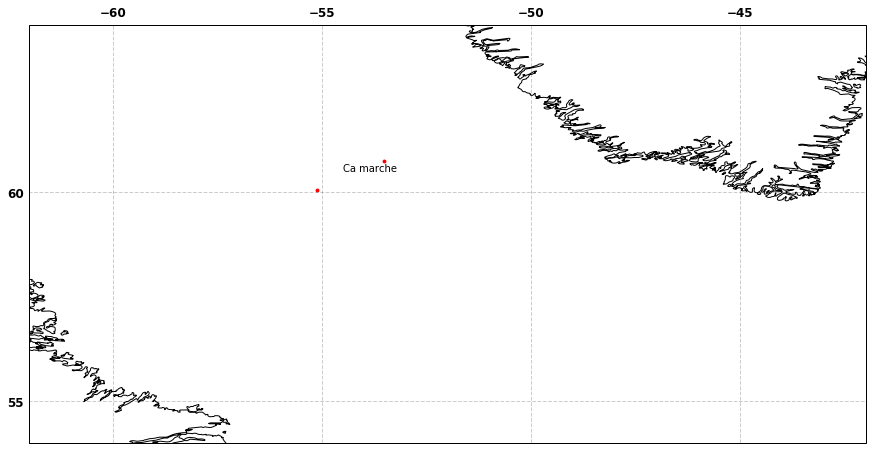

In [21]:
# Localisation du tourbillon à différents moments de l'année

fig = plt.figure(figsize=(15,10))
pj = ccrs.PlateCarree()
ax = plt.axes(projection=pj)
ax.coastlines(resolution="10m")

gl = ax.gridlines(crs=pj, draw_labels=True,
                  linewidth=1, color='black', alpha=0.2, linestyle='--')

label_style = {'size': 12, 'color': 'black', 'weight': 'bold'}

gl.xlabel_style = label_style
gl.xlabels_bottom = False
gl.xlocator = mticker.FixedLocator(np.arange(-90,20,5,dtype=float))

gl.ylabel_style = label_style
gl.ylabels_right = False
gl.ylocator = mticker.FixedLocator(np.arange(15,80,5,dtype=float))

    # pcolormesh
    
#cs = plt.pcolormesh(lon, lat, data,transform=pj,cmap=cmap,vmin=vmin,vmax=vmax)
plt.scatter(-55.11549,60.04951, linewidth='0', s=15,color='r')
#déplacement en mai.
plt.scatter(-53.5135,60.74797, linewidth='0', s=15,color='r')

plt.text (-54.5,60.5, 'Ca marche')
#plt.scatter(lonOV[0:90],latOV[0:90], linewidth='0', s=15,color='r')
#plt.scatter(-16.3,49, linewidth='0', s=50,color='r',marker='*')
#ax.plot([-50, -20], [30, 30],linewidth='2',color='r')
#ax.plot([-50, -20], [50, 50],linewidth='2',color='r')
#ax.plot([-50, -50], [30, 50],linewidth='2',color='r')
#ax.plot([-20, -20], [30, 50],linewidth='2',color='r')
    # limits
plt.xlim((-62,-42))
plt.ylim((54,64)) 

    

In [66]:
# suivi sur 2007, par exemple en Décembre d'un tourbillon isolé

m = '12'
DimBoite = [0,0,0,0]
ListePosition = []
for i in range(1,32):
    day = i
    if i<10:
        d = '0' + str(day)
    else:
        d = str(day)
    SSHfile = '/mnt/barboty/equipes/meom/MODEL_SET/NATL60/NATL60LAB-MJM155-S/1d/2007/NATL60LAB-MJM155_y2007m'+ m + 'd'+ d +'.1d_SSHMXL.nc'
    from netCDF4 import Dataset
    f = Dataset(SSHfile, "r", format="NETCDF4")
    SSH = f.variables['sossheig'][0]
    if i == 1:
        DimBoite = [300, 440, 315, 390]
        (hor, ver) = position(SSH, DimBoite)
    else:
        (hor, ver) = position(SSH, DimBoite)
    ListePosition.append([hor,ver])
    print(ListePosition[i-1],i)   #Visualisation du résultat
    DimBoite = [hor-50,hor+50,ver-50,ver+50]

([368, 358], 1)
([360, 359], 2)
([364, 357], 3)
([375, 353], 4)
([387, 344], 5)
([394, 335], 6)
([398, 328], 7)
([398, 322], 8)
([396, 317], 9)
([393, 315], 10)
([391, 314], 11)
([390, 313], 12)
([388, 313], 13)
([386, 315], 14)
([386, 317], 15)
([387, 318], 16)
([387, 317], 17)
([387, 314], 18)
([385, 309], 19)
([383, 303], 20)
([381, 295], 21)
([377, 286], 22)
([373, 278], 23)
([368, 271], 24)
([364, 266], 25)
([361, 262], 26)
([360, 258], 27)
([360, 255], 28)
([362, 251], 29)
([365, 246], 30)
([369, 240], 31)


In [68]:
# suivi sur 2007, par exemple en Décembre d'un tourbillon au contact d'autres tourbillons

m = '12'
DimBoite = [0,0,0,0]
ListePosition = []
for i in range(1,32):
    day = i
    if i<10:
        d = '0' + str(day)
    else:
        d = str(day)
    SSHfile = '/mnt/barboty/equipes/meom/MODEL_SET/NATL60/NATL60LAB-MJM155-S/1d/2007/NATL60LAB-MJM155_y2007m'+ m + 'd'+ d +'.1d_SSHMXL.nc'
    from netCDF4 import Dataset
    f = Dataset(SSHfile, "r", format="NETCDF4")
    SSH = f.variables['sossheig'][0]
    if i == 1:
        DimBoite = [290, 360, 520, 610]
        (hor, ver) = position(SSH, DimBoite)
    else:
        (hor, ver) = position(SSH, DimBoite)
    ListePosition.append([hor,ver])
    print(ListePosition[i-1],i)   #Visualisation du résultat
    DimBoite = [hor-30,hor+30,ver-30,ver+30] #Il le perd le jour 26
    
    
    
    ## Pour gérer ça, on peut mettre un plafond sur le SSH pour corriger, nécessite une correction humaine,
    ## le script ne sera pas automatique.

([316, 560], 1)
([316, 552], 2)
([316, 545], 3)
([317, 536], 4)
([317, 526], 5)
([315, 516], 6)
([313, 508], 7)
([311, 502], 8)
([309, 498], 9)
([305, 496], 10)
([301, 495], 11)
([298, 496], 12)
([296, 498], 13)
([298, 499], 14)
([300, 501], 15)
([307, 502], 16)
([314, 504], 17)
([321, 511], 18)
([332, 522], 19)
([346, 530], 20)
([355, 535], 21)
([361, 539], 22)
([365, 540], 23)
([367, 536], 24)
([367, 534], 25)
([337, 563], 26)
([323, 572], 27)
([330, 562], 28)
([337, 557], 29)
([366, 527], 30)
([387, 521], 31)


In [4]:
# Test en période de convection

m = '01'                                          # Entrée du mois étudié Tourbillon bien visible en Janvier, OK
DimBoite = [0,0,0,0]
ListePosition = []
for i in range(1,32):
    day = i
    if i<10:
        d = '0' + str(day)
    else:
        d = str(day)
    SSHfile = '/mnt/barboty/equipes/meom/MODEL_SET/NATL60/NATL60LAB-MJM155-S/1d/2007/NATL60LAB-MJM155_y2007m'+ m + 'd'+ d +'.1d_SSHMXL.nc'
    from netCDF4 import Dataset
    f = Dataset(SSHfile, "r", format="NETCDF4")
    SSH = f.variables['sossheig'][0]
    if i == 1:
        DimBoite = [170, 270, 535, 605]
        (hor, ver) = position(SSH, DimBoite)
    else:
        (hor, ver) = position(SSH, DimBoite)
    ListePosition.append([hor,ver])
    print(ListePosition[i-1],i)   #Visualisation du résultat
    DimBoite = [hor-50,hor+50,ver-50,ver+50]

([217, 572], 1)
([220, 571], 2)
([224, 571], 3)
([231, 573], 4)
([235, 575], 5)
([242, 580], 6)
([249, 587], 7)
([257, 592], 8)
([260, 594], 9)
([260, 593], 10)
([257, 589], 11)
([251, 585], 12)
([245, 582], 13)
([240, 579], 14)
([238, 574], 15)
([234, 569], 16)
([232, 565], 17)
([231, 566], 18)
([235, 567], 19)
([240, 569], 20)
([244, 570], 21)
([246, 571], 22)
([250, 576], 23)
([256, 580], 24)
([261, 583], 25)
([271, 583], 26)
([280, 573], 27)
([286, 563], 28)
([288, 557], 29)
([290, 553], 30)
([288, 555], 31)


In [8]:
# Test en Février

m = '02'                                          # Entrée du mois étudié
DimBoite = [0,0,0,0]
ListePosition = []
nbjours = 0

if (m == '01' or m == '03' or m == '05' or m == '07' or m == '08' or m == '10' or m == '12'):
    nbjours = 31
elif (m == '02'):
    nbjours = 28
else:
    nbjours = 30

for i in range(1,nbjours+1):
    day = i
    if i<10:
        d = '0' + str(day)
    else:
        d = str(day)
    SSHfile = '/mnt/barboty/equipes/meom/MODEL_SET/NATL60/NATL60LAB-MJM155-S/1d/2007/NATL60LAB-MJM155_y2007m'+ m + 'd'+ d +'.1d_SSHMXL.nc'
    from netCDF4 import Dataset
    f = Dataset(SSHfile, "r", format="NETCDF4")
    SSH = f.variables['sossheig'][0]
    if i == 1:
        DimBoite = [238, 338, 505, 605]
        (hor, ver) = position(SSH, DimBoite)
    else:
        (hor, ver) = position(SSH, DimBoite)
    ListePosition.append([hor,ver])
    print(ListePosition[i-1],i)   #Visualisation du résultat
    DimBoite = [hor-40,hor+40,ver-40,ver+40]                              #Le mouvement est faible mais les tourbillons sont proches, on raffine

([287, 559], 1)
([291, 559], 2)
([290, 559], 3)
([292, 557], 4)
([292, 553], 5)
([288, 553], 6)
([288, 553], 7)
([286, 552], 8)
([284, 548], 9)
([281, 545], 10)
([279, 541], 11)
([277, 538], 12)
([278, 538], 13)
([285, 539], 14)
([294, 540], 15)
([300, 548], 16)
([313, 560], 17)
([322, 570], 18)
([327, 579], 19)
([333, 582], 20)
([334, 579], 21)
([330, 573], 22)
([325, 570], 23)
([321, 566], 24)
([317, 560], 25)
([313, 554], 26)
([309, 550], 27)
([311, 538], 28)


In [10]:
# Mois de mars. Plus complexe. Nécessite une boite de 30*30. Plus bas, on rate des max

m = '03'                                          # Entrée du mois étudié
DimBoite = [0,0,0,0]
ListePosition = []
nbjours = 0

if (m == '01' or m == '03' or m == '05' or m == '07' or m == '08' or m == '10' or m == '12'):
    nbjours = 31
elif (m == '02'):
    nbjours = 28
else:
    nbjours = 30

for i in range(1,nbjours+1):
    day = i
    if i<10:
        d = '0' + str(day)
    else:
        d = str(day)
    SSHfile = '/mnt/barboty/equipes/meom/MODEL_SET/NATL60/NATL60LAB-MJM155-S/1d/2007/NATL60LAB-MJM155_y2007m'+ m + 'd'+ d +'.1d_SSHMXL.nc'
    from netCDF4 import Dataset
    f = Dataset(SSHfile, "r", format="NETCDF4")
    SSH = f.variables['sossheig'][0]
    if i == 1:
        DimBoite = [291, 331, 518, 558]
        (hor, ver) = position(SSH, DimBoite)
    else:
        (hor, ver) = position(SSH, DimBoite)
    ListePosition.append([hor,ver])
    print(ListePosition[i-1],i)   #Visualisation du résultat
    DimBoite = [hor-30,hor+30,ver-30,ver+30]

([316, 522], 1)
([328, 511], 2)
([345, 511], 3)
([365, 515], 4)
([372, 520], 5)
([377, 535], 6)
([384, 547], 7)
([392, 553], 8)
([402, 556], 9)
([413, 554], 10)
([425, 547], 11)
([440, 541], 12)
([458, 539], 13)
([476, 546], 14)
([492, 555], 15)
([501, 563], 16)
([507, 573], 17)
([511, 582], 18)
([509, 586], 19)
([531, 597], 20)
([501, 600], 21)
([477, 605], 22)
([462, 614], 23)
([446, 613], 24)
([433, 615], 25)
([428, 606], 26)
([423, 594], 27)
([421, 588], 28)
([417, 584], 29)
([418, 580], 30)
([418, 579], 31)
